In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc, f1_score

## Business Context

Business Question

How do we reduce the hiring process timeframe in order to be able to fill a role as soon as an employee leaves?

In [2]:
df = pd.read_csv("recruitment_decision_tree.csv")
df.set_index("Serial_no", inplace=True)

In [3]:
df.head()

,Gender,Python_exp,Experience_Years,Education,Internship,Score,Salary * 10E4,Offer_History,Location,Recruitment_Status
Serial_no,,,,,,,,,,
1,Male,Yes,0.0,Graduate,No,5139,0.0,1.0,Urban,Y
2,Male,No,1.0,Graduate,No,4583,128.0,1.0,Rural,N
3,Male,No,0.0,Graduate,Yes,3000,66.0,1.0,Urban,Y
4,Male,No,0.0,Not Graduate,No,2583,120.0,1.0,Urban,Y
5,Male,Yes,0.0,Graduate,No,6000,141.0,1.0,Urban,Y


In [4]:
df.shape

(614, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 1 to 614
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Python_exp          611 non-null    object 
 2   Experience_Years    599 non-null    float64
 3   Education           614 non-null    object 
 4   Internship          582 non-null    object 
 5   Score               614 non-null    int64  
 6   Salary * 10E4       593 non-null    float64
 7   Offer_History       564 non-null    float64
 8   Location            614 non-null    object 
 9   Recruitment_Status  614 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.8+ KB


In [6]:
print(df.isnull().sum())

Gender                13
Python_exp             3
Experience_Years      15
Education              0
Internship            32
Score                  0
Salary * 10E4         21
Offer_History         50
Location               0
Recruitment_Status     0
dtype: int64


In [7]:
# List of numerical features
numerical_features = ['Experience_Years', 'Score', 'Salary * 10E4']

# List of categorical features
categorical_features = ['Gender', 'Python_exp', 'Education', 'Internship', 'Location', 'Recruitment_Status', 'Offer_History']

# Describe numerical features and round to 2 decimals
numerical_summary = df[numerical_features].describe().round(2).T

# Describe categorical features
categorical_summary = df[categorical_features].describe().T

# Print the summary statistics for numerical features
print("Numerical Features:")
print(numerical_summary)

# Print the summary statistics for categorical features
print("\nCategorical Features:")
print(categorical_summary)

Numerical Features:
                  count     mean      std    min     25%     50%     75%  \
Experience_Years  599.0     0.76     1.02    0.0     0.0     0.0     2.0   
Score             614.0  5402.30  6109.02  150.0  2877.5  3812.5  5771.5   
Salary * 10E4     593.0   146.17    85.73    0.0   100.0   128.0   168.0   

                      max  
Experience_Years      3.0  
Score             81000.0  
Salary * 10E4       700.0  

Categorical Features:
               count      mean       std  min  25%  50%  75%  max
Offer_History  564.0  0.842199  0.364878  0.0  1.0  1.0  1.0  1.0


## data cleanup

In [8]:
df['Offer_History'].fillna(1.0, inplace=True)
df['Offer_History'] = df['Offer_History'].astype(str)

In [9]:
df['Experience_Years'].fillna(0, inplace=True)

In [10]:
df['Internship'] = df['Internship'].fillna('No')

In [11]:
# Calculate the mean salary by education and location
mean_salary_by_location = df.groupby(['Education', 'Location'])['Salary * 10E4'].transform('mean')

# Fill missing salary values with the calculated means
df['Salary * 10E4'].fillna(mean_salary_by_location, inplace=True)

In [12]:
# Fill missing gender values with unknown
df['Gender'] = df['Gender'].fillna('Unknown')

In [13]:
df['Python_exp'] = df['Python_exp'].fillna('No')

In [14]:
df.Offer_History.unique()

array(['1.0', '0.0'], dtype=object)

## EDA

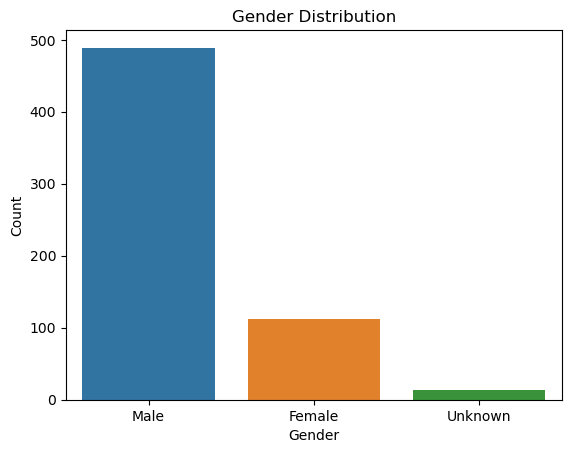

In [15]:
# Plot the gender distribution using a count plot
sns.countplot(x='Gender', data=df)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

# Show the plot
plt.show()

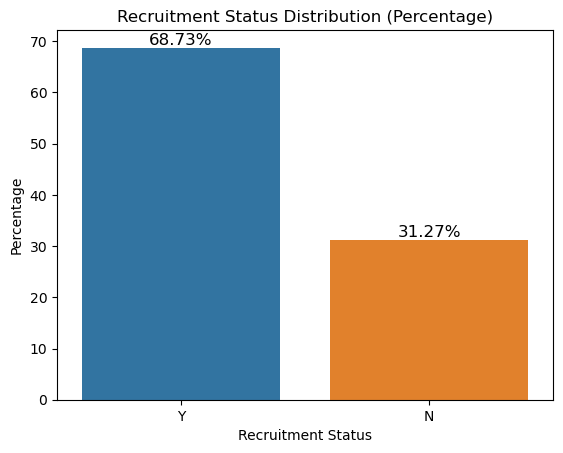

In [16]:
# Calculate the percentage distribution
percentage_distribution = (df['Recruitment_Status'].value_counts() / len(df)) * 100

# Create a countplot using Seaborn
ax = sns.barplot(x=percentage_distribution.index, y=percentage_distribution.values)

# Add labels and title
plt.xlabel('Recruitment Status')
plt.ylabel('Percentage')
plt.title('Recruitment Status Distribution (Percentage)')

# Annotate the bars with percentages
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()

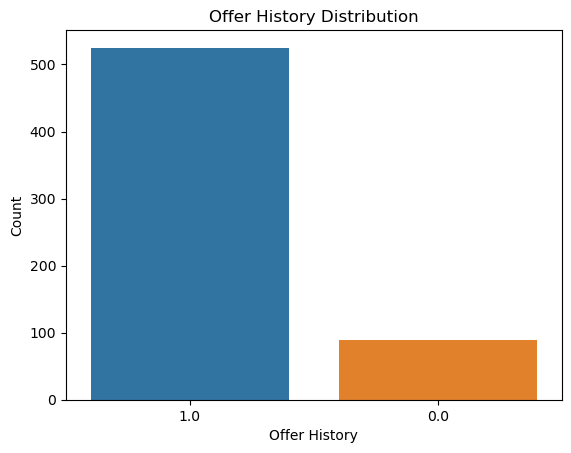

In [17]:
# Plot the distribution of 'Offer_History'
sns.countplot(x='Offer_History', data=df)

# Add labels and title
plt.xlabel('Offer History')
plt.ylabel('Count')
plt.title('Offer History Distribution')

# Show the plot
plt.show()

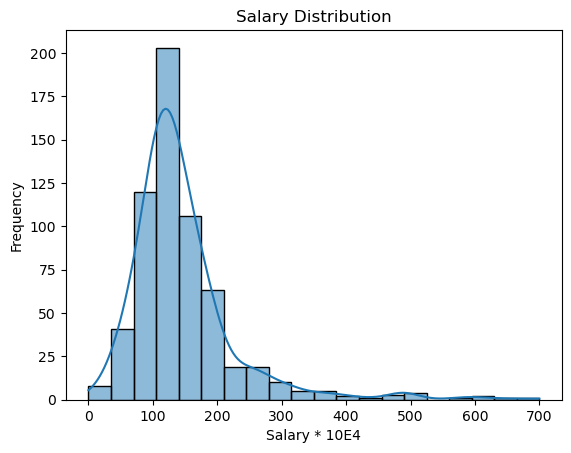

In [18]:
# Plot the histogram for 'Salary * 10E4'
sns.histplot(df['Salary * 10E4'], bins=20, kde=True)

# Add labels and title
plt.xlabel('Salary * 10E4')
plt.ylabel('Frequency')
plt.title('Salary Distribution')

# Show the plot
plt.show()

salary distribution ~~ 1.2m

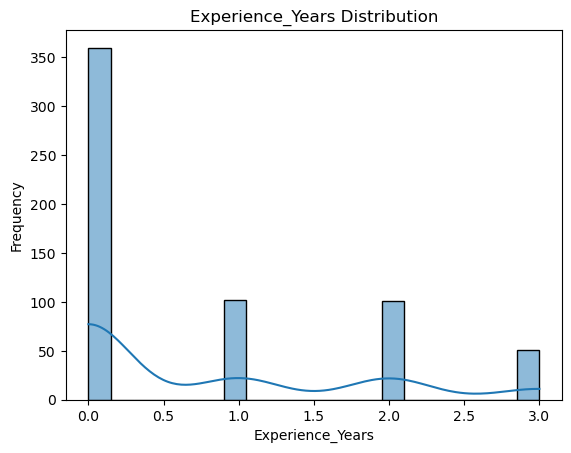

In [19]:
# Plot the histogram for 'Salary * 10E4'
sns.histplot(df['Experience_Years'], bins=20, kde=True)

# Add labels and title
plt.xlabel('Experience_Years')
plt.ylabel('Frequency')
plt.title('Experience_Years Distribution')

# Show the plot
plt.show()

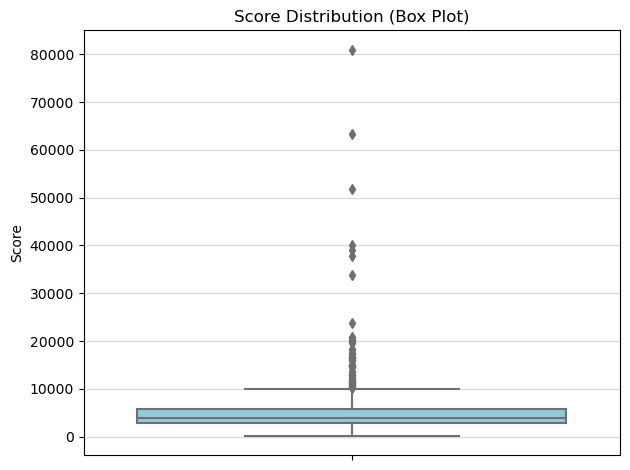

In [20]:
# Create a box plot using Seaborn
sns.boxplot(data=df, y='Score', color='skyblue')

# Add labels and title
plt.ylabel('Score')
plt.title('Score Distribution (Box Plot)')

# Adding grid lines
plt.grid(axis='y', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

In [21]:
# Select the column for which you want to detect outliers
column_name = 'Score'

# Calculate the IQR (Interquartile Range) for the column
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

print(f"Number of outliers in '{column_name}': {num_outliers}")

Number of outliers in 'Score': 51


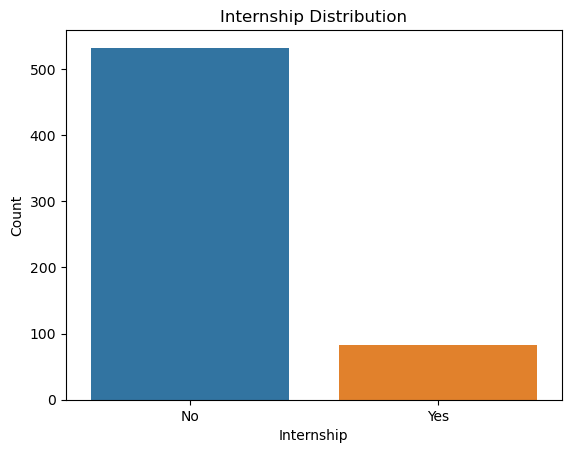

In [22]:
# Plot the distribution of 'Internship'
sns.countplot(x='Internship', data=df)

# Add labels and title
plt.xlabel('Internship')
plt.ylabel('Count')
plt.title('Internship Distribution')

# Show the plot
plt.show()

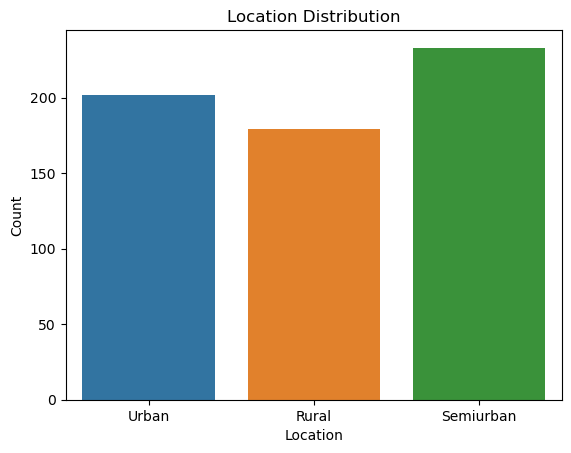

In [23]:
# Plot the distribution of 'Location'
sns.countplot(x='Location', data=df)

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Location Distribution')

# Show the plot
plt.show()

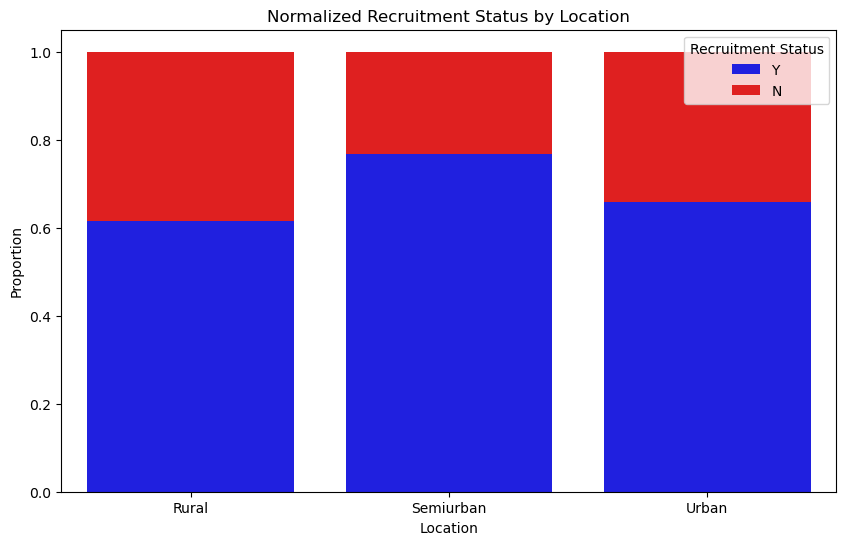

In [24]:
# Create a normalized stacked bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Calculate the proportions of each recruitment status by location
prop_df = df.groupby(['Location', 'Recruitment_Status']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

sns.barplot(data=prop_df.reset_index(), x='Location', y='Y', color='blue', label='Y')
sns.barplot(data=prop_df.reset_index(), x='Location', y='N', bottom=prop_df['Y'], color='red', label='N')

plt.xlabel('Location')
plt.ylabel('Proportion')
plt.title('Normalized Recruitment Status by Location')
plt.legend(title='Recruitment Status')
plt.show()

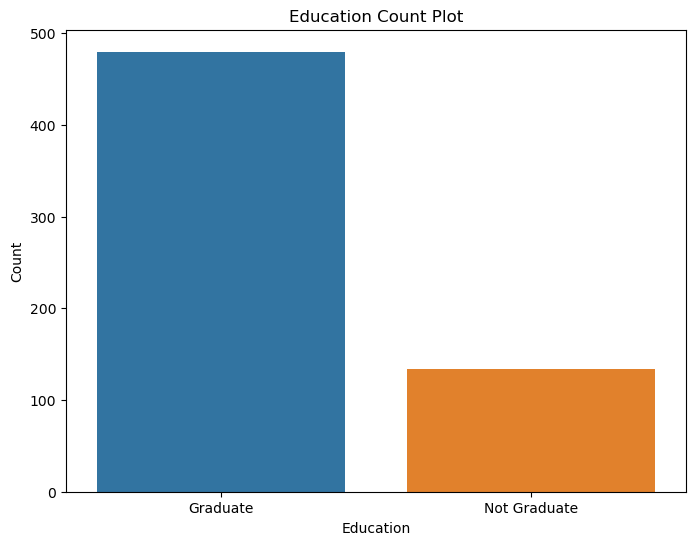

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Education')
plt.title('Education Count Plot')
plt.xlabel('Education')
plt.ylabel('Count')

plt.show()

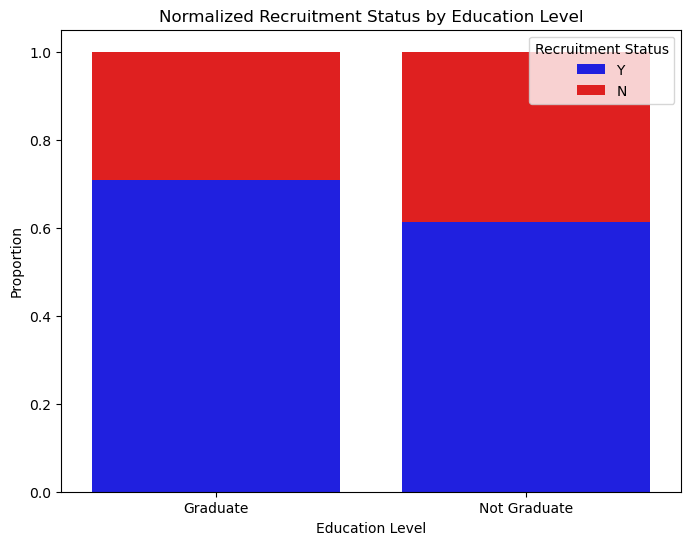

In [26]:
# Create a normalized stacked bar plot using Seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

# Calculate the proportions of each combination of education and recruitment status
prop_df = df.groupby(['Education', 'Recruitment_Status']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

sns.barplot(data=prop_df.reset_index(), x='Education', y='Y', color='blue', label='Y')
sns.barplot(data=prop_df.reset_index(), x='Education', y='N', bottom=prop_df['Y'], color='red', label='N')

plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.title('Normalized Recruitment Status by Education Level')
plt.legend(title='Recruitment Status')
plt.show()

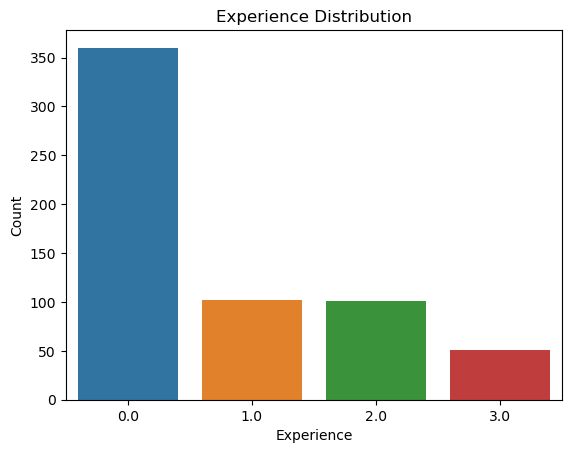

In [27]:
# Plot the distribution of 'Experience in years'
sns.countplot(x='Experience_Years', data=df)

# Add labels and title
plt.xlabel('Experience')
plt.ylabel('Count')
plt.title('Experience Distribution')

# Show the plot
plt.show()

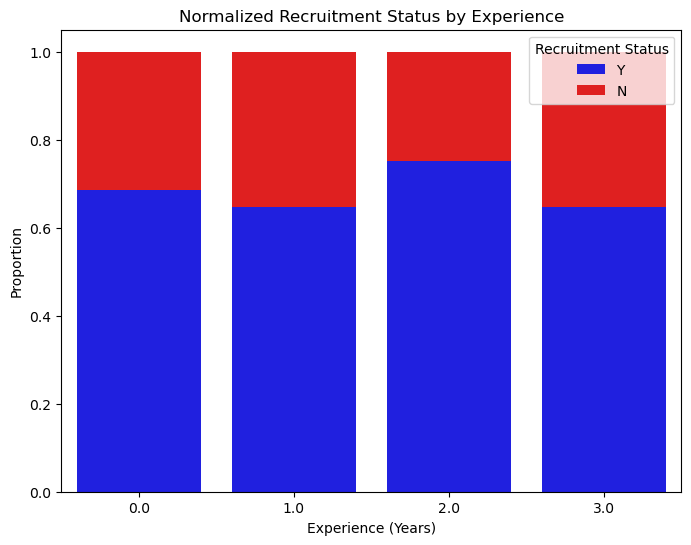

In [28]:
# Create a normalized stacked bar plot using Seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

# Calculate the proportions of each combination of experience and recruitment status
prop_df = df.groupby(['Experience_Years', 'Recruitment_Status']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

sns.barplot(data=prop_df.reset_index(), x='Experience_Years', y='Y', color='blue', label='Y')
sns.barplot(data=prop_df.reset_index(), x='Experience_Years', y='N', bottom=prop_df['Y'], color='red', label='N')

plt.xlabel('Experience (Years)')
plt.ylabel('Proportion')
plt.title('Normalized Recruitment Status by Experience')
plt.legend(title='Recruitment Status')
plt.show()

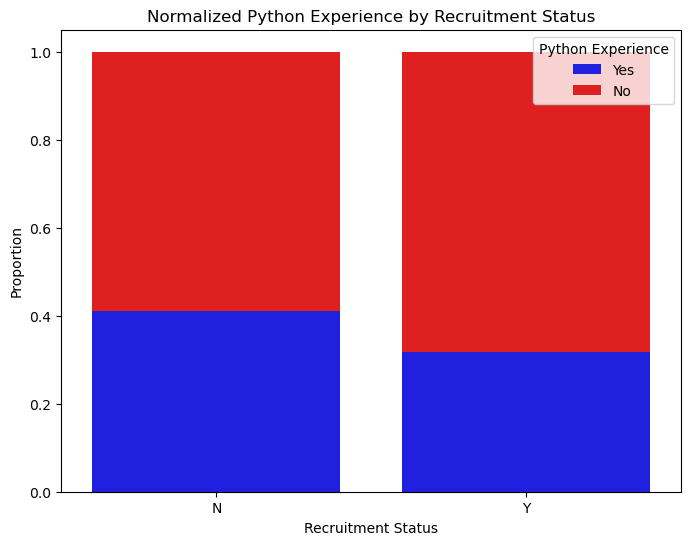

In [29]:
# Create a normalized stacked bar plot using Seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

# Calculate the proportions of each combination of recruitment status and Python experience
prop_df = df.groupby(['Recruitment_Status', 'Python_exp']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

sns.barplot(data=prop_df.reset_index(), x='Recruitment_Status', y='Yes', color='blue', label='Yes')
sns.barplot(data=prop_df.reset_index(), x='Recruitment_Status', y='No', bottom=prop_df['Yes'], color='red', label='No')

plt.xlabel('Recruitment Status')
plt.ylabel('Proportion')
plt.title('Normalized Python Experience by Recruitment Status')
plt.legend(title='Python Experience')
plt.show()

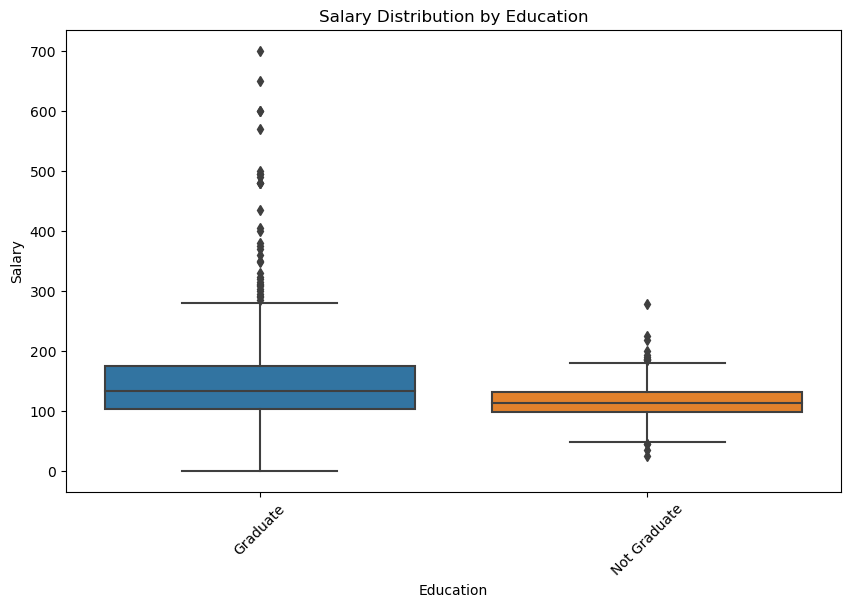

In [30]:
# Create a box plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Salary * 10E4', data=df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Education')
plt.ylabel('Salary')
plt.title('Salary Distribution by Education')
plt.show()

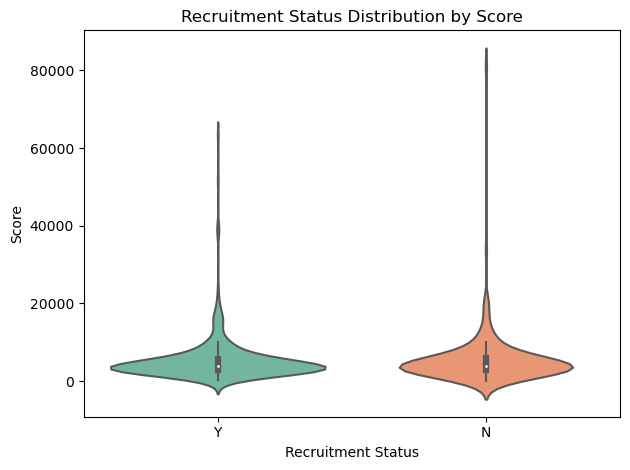

In [31]:
# Create a violin plot using Seaborn
sns.violinplot(data=df, x='Recruitment_Status', y='Score', palette='Set2')

# Add labels and title
plt.xlabel('Recruitment Status')
plt.ylabel('Score')
plt.title('Recruitment Status Distribution by Score')

# Show the plot
plt.tight_layout()
plt.show()

## Data preprocessing

## Categorcial Encoding

In [32]:
#encode data for non decision tree based algorhythm
# List of columns to apply one-hot encoding
categorical_columns = ['Gender', 'Python_exp', 'Education', 'Internship', 'Offer_History', 'Location']

# Apply one-hot encoding to the specified columns
df_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=False)
df_dummies['Recruitment_Status'] = df_dummies['Recruitment_Status'].apply(lambda x: 1 if x == 'Y' else 0)

In [33]:
df_dummies.head()

,Experience_Years,Score,Salary * 10E4,Recruitment_Status,Gender_Female,Gender_Male,Gender_Unknown,Python_exp_No,Python_exp_Yes,Education_Graduate,Education_Not Graduate,Internship_No,Internship_Yes,Offer_History_0.0,Offer_History_1.0,Location_Rural,Location_Semiurban,Location_Urban
Serial_no,,,,,,,,,,,,,,,,,,
1,0.0,5139,0.0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1
2,1.0,4583,128.0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0
3,0.0,3000,66.0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1
4,0.0,2583,120.0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1
5,0.0,6000,141.0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1


In [34]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 1 to 614
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Experience_Years        614 non-null    float64
 1   Score                   614 non-null    int64  
 2   Salary * 10E4           614 non-null    float64
 3   Recruitment_Status      614 non-null    int64  
 4   Gender_Female           614 non-null    uint8  
 5   Gender_Male             614 non-null    uint8  
 6   Gender_Unknown          614 non-null    uint8  
 7   Python_exp_No           614 non-null    uint8  
 8   Python_exp_Yes          614 non-null    uint8  
 9   Education_Graduate      614 non-null    uint8  
 10  Education_Not Graduate  614 non-null    uint8  
 11  Internship_No           614 non-null    uint8  
 12  Internship_Yes          614 non-null    uint8  
 13  Offer_History_0.0       614 non-null    uint8  
 14  Offer_History_1.0       614 non-null    ui

In [35]:
# List of columns to apply label encoding
categorical_columns = ['Gender', 'Python_exp', 'Education', 'Internship', 'Offer_History', 'Location']

# Create a new DataFrame df_dt by copying df
df_dt = df.copy()

# Apply label encoding to the specified columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df_dt[col] = label_encoder.fit_transform(df_dt[col])

# Convert the target variable to binary if needed
df_dt['Recruitment_Status'] = df_dt['Recruitment_Status'].apply(lambda x: 1 if x == 'Y' else 0)

In [36]:
df_dt.head()

,Gender,Python_exp,Experience_Years,Education,Internship,Score,Salary * 10E4,Offer_History,Location,Recruitment_Status
Serial_no,,,,,,,,,,
1,1,1,0.0,0,0,5139,0.0,1,2,1
2,1,0,1.0,0,0,4583,128.0,1,0,0
3,1,0,0.0,0,1,3000,66.0,1,2,1
4,1,0,0.0,1,0,2583,120.0,1,2,1
5,1,1,0.0,0,0,6000,141.0,1,2,1


## Assigning Target and Features

In [37]:
X = df_dummies.drop(columns=['Recruitment_Status'])
y = df_dummies['Recruitment_Status']

Xdt = df_dt.drop(columns=['Recruitment_Status'])
ydt = df_dt['Recruitment_Status']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Xdt_train, Xdt_test, ydt_train, ydt_test = train_test_split(Xdt, ydt, test_size=0.2, random_state=42, stratify=y)

In [39]:
X_train.shape

(491, 17)

## Scaling

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler = StandardScaler()
Xdt_train_scaled = scaler.fit_transform(Xdt_train)
Xdt_test_scaled = scaler.transform(Xdt_test)

## Machine Learning

## Logreg

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

#logreg = LogisticRegression(penalty='l2', C=0.7886178861788617)
logreg = LogisticRegression()

In [42]:
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

## SVM

In [43]:
from sklearn.svm import SVC

#svm_model = SVC(C=1.0, kernel='rbf', gamma='auto', probability=True)
svm_model = SVC(probability=True)

In [44]:
svm_model.fit(X_train_scaled, y_train)

SVC(probability=True)

## GaussianNB

In [45]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()

In [46]:
gnb_model.fit(X_train_scaled, y_train)

GaussianNB()

## KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=37)

In [48]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=37)

## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
#rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=2, min_samples_split=2, random_state=42, class_weight='balanced')

rf_params = {
    'n_estimators': 1837,
    'min_samples_split': 0.15,
    'min_samples_leaf': 1,
    'max_depth': 48,
    'bootstrap': True
}

rf_classifier = RandomForestClassifier(**rf_params)
#rf_classifier = RandomForestClassifier()

In [50]:
rf_classifier.fit(Xdt_train_scaled, ydt_train)

RandomForestClassifier(max_depth=48, min_samples_split=0.15, n_estimators=1837)

In [51]:
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(float)

    prediction_int = np.round(prediction)

    accuracy_ = accuracy_score(actual, prediction_int)
    precision_ = precision_score(actual, prediction_int)
    recall_ = recall_score(actual, prediction_int)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction_int)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction_int)
    average_precision = average_precision_score(actual, prediction_int)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')

    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()

    return (accuracy_, precision_, recall_, roc_auc_)

***********************
* Logistic Regression *
***********************
Accuracy : 0.7963 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7801 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9792 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7671                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


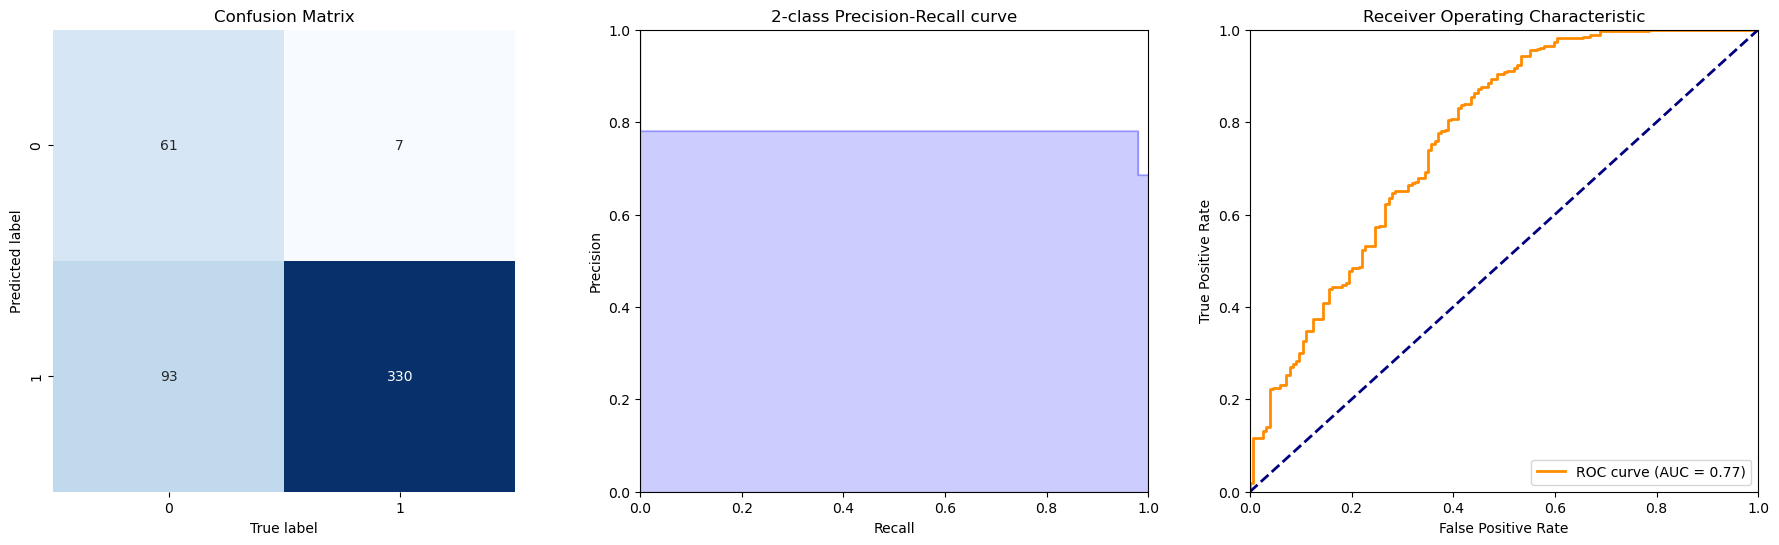

Accuracy : 0.8537 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8317 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9882 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8582                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


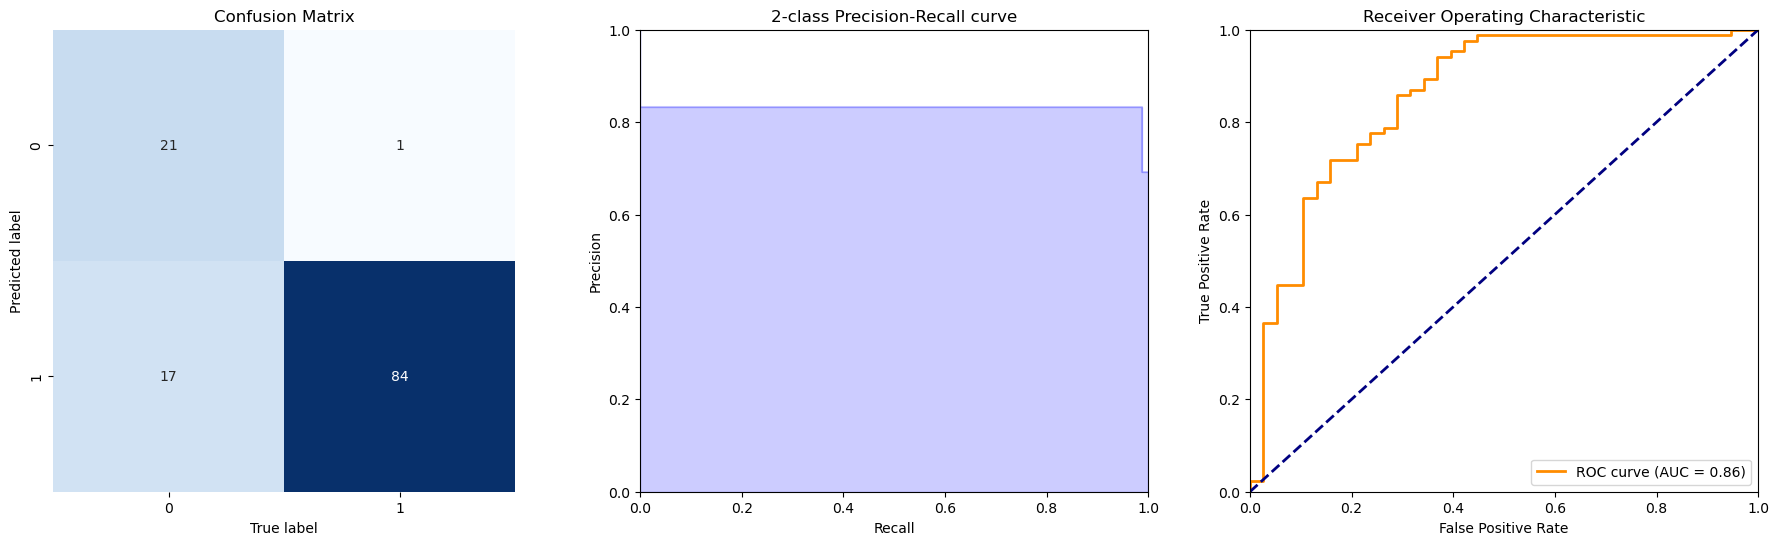


*******
* SVM *
*******
Accuracy : 0.8065 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7867 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9852 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8245                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


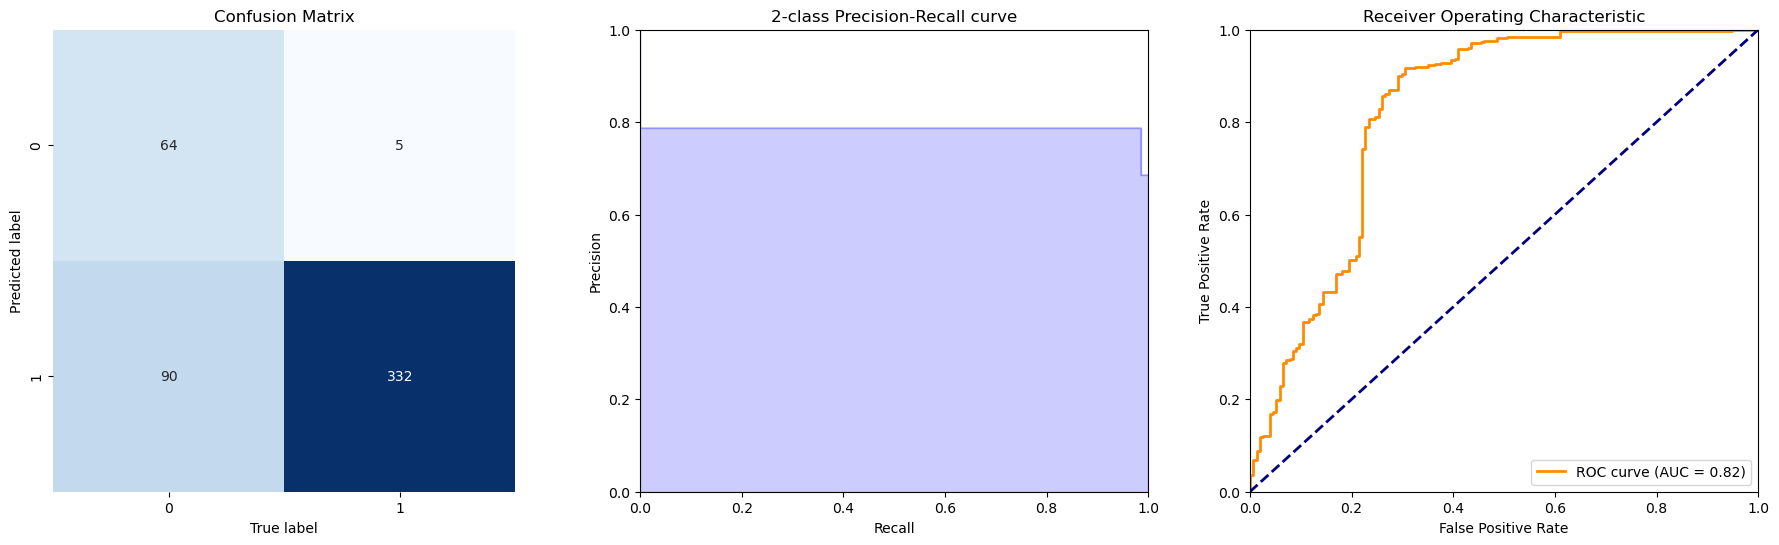

Accuracy : 0.8537 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8317 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9882 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8130                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


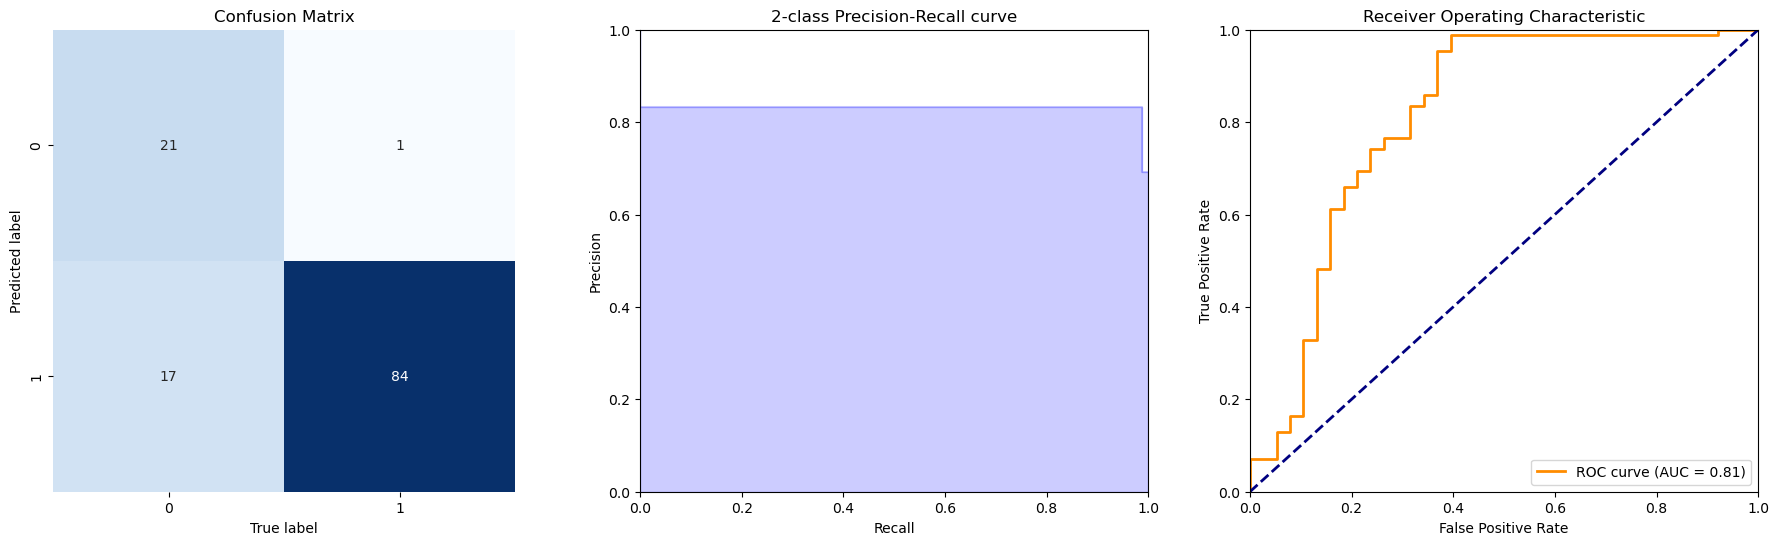


*******
* GNB *
*******
Accuracy : 0.7923 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7804 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9703 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7443                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


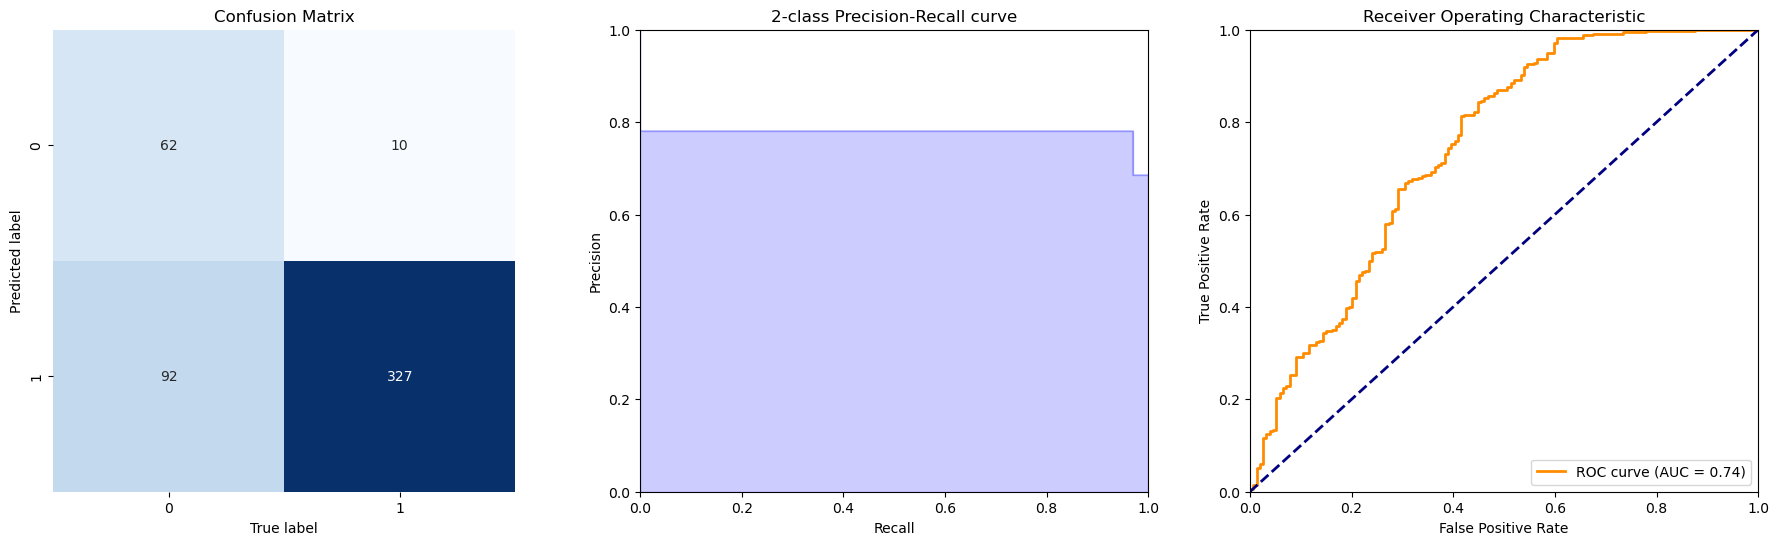

Accuracy : 0.8455 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8367 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9647 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8322                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


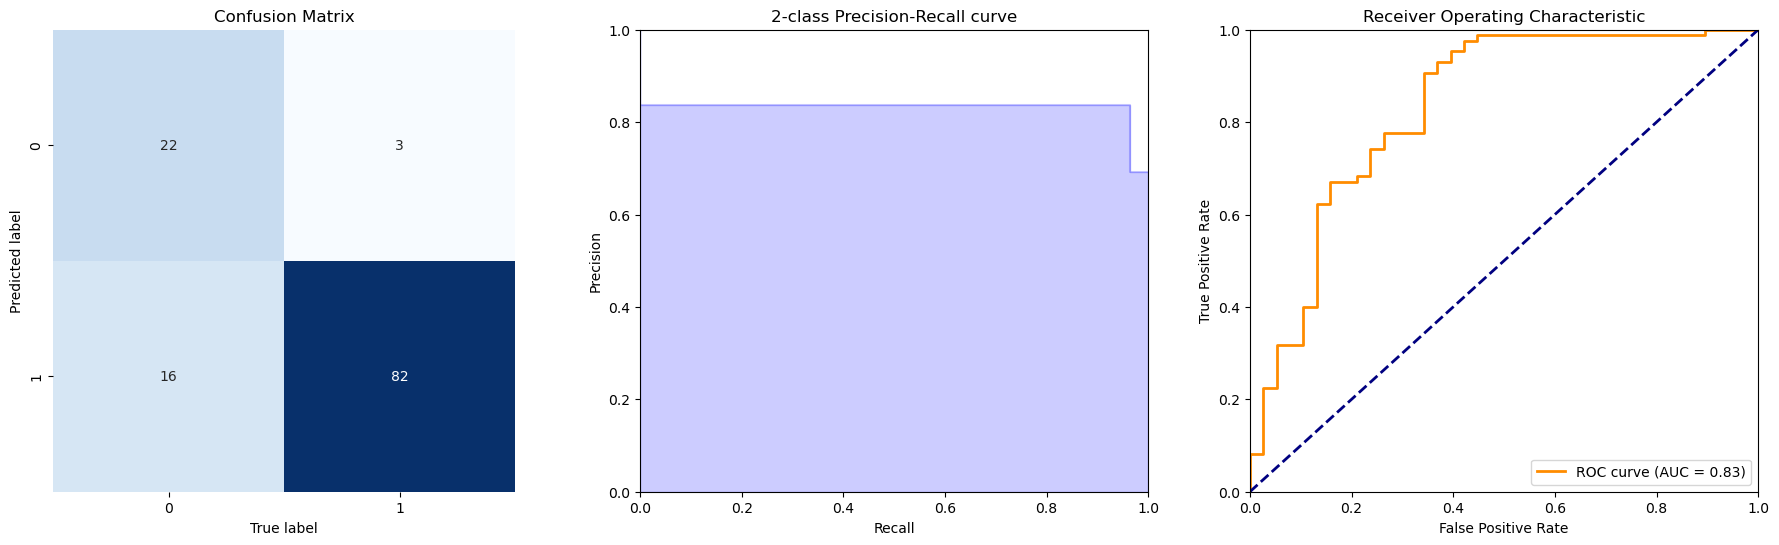


*******
* KNN *
*******
Accuracy : 0.7943 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7744 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9881 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7528                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


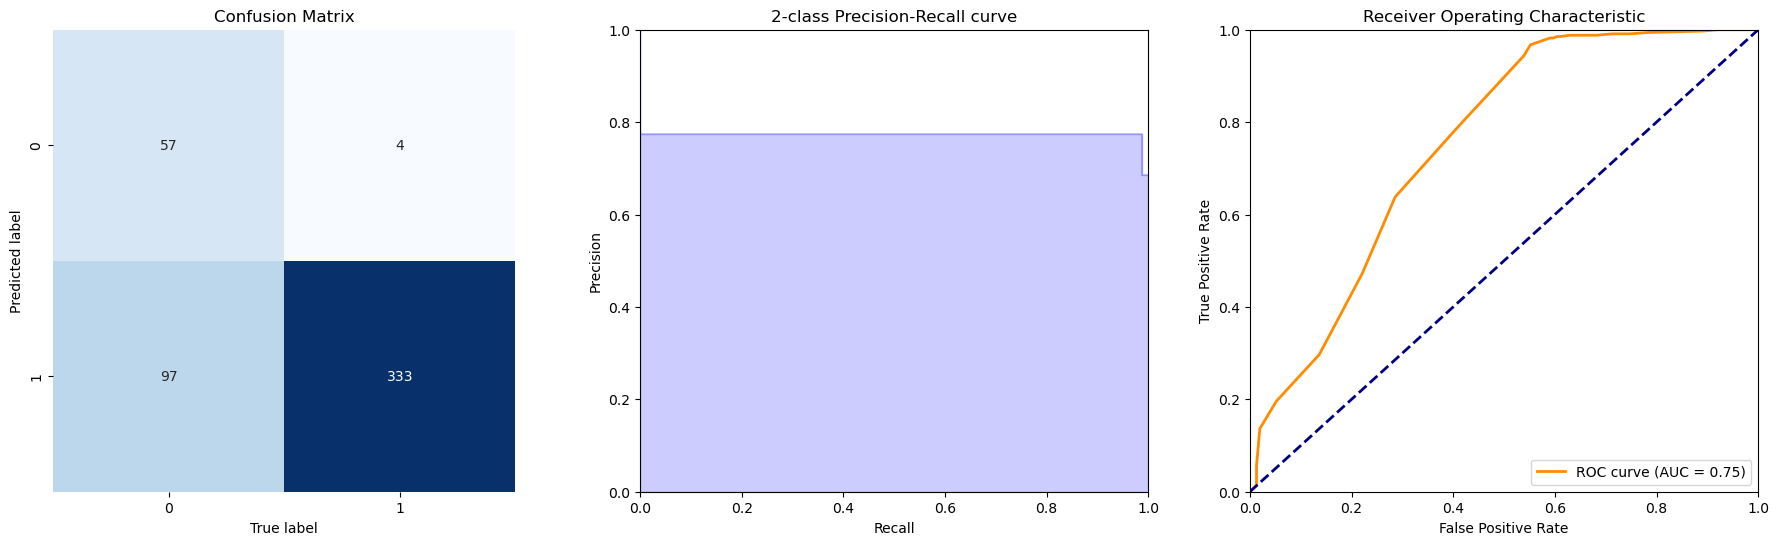

Accuracy : 0.8374 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8155 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9882 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8469                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


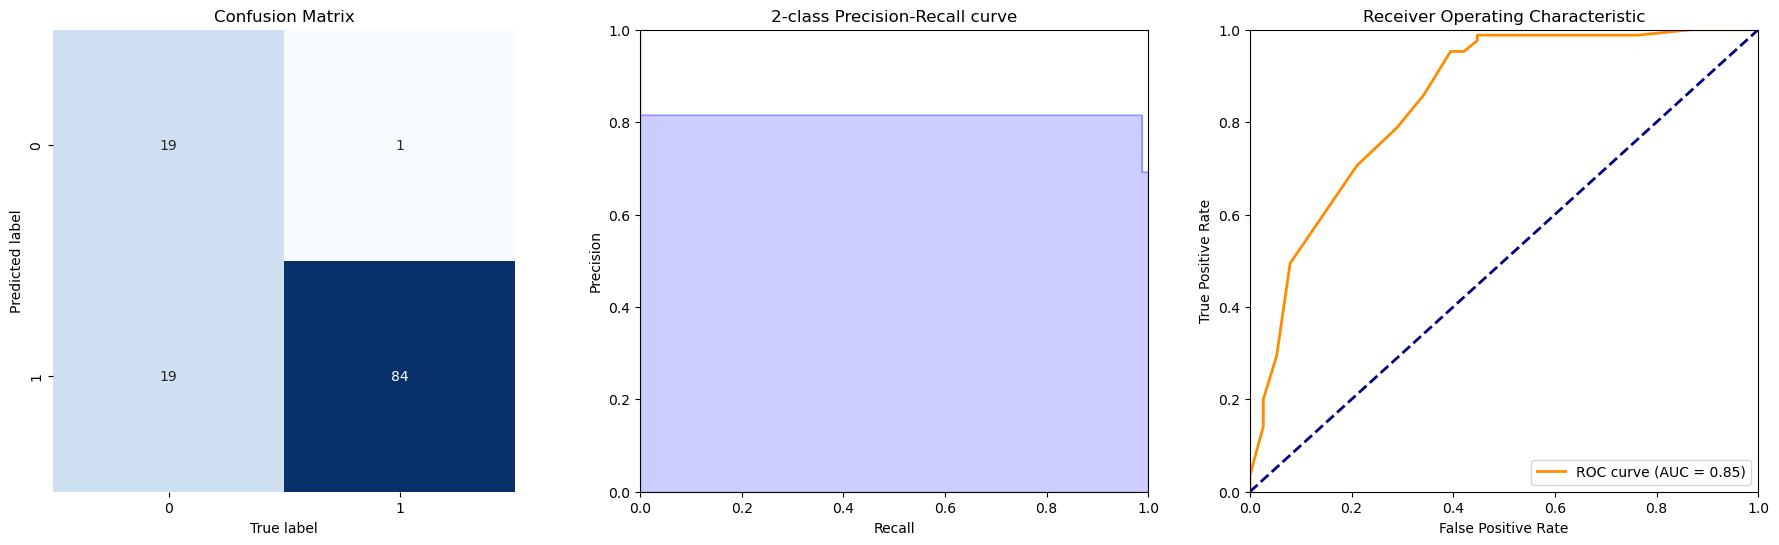


*****************
* Random Forest *
*****************
Accuracy : 0.7984 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7807 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9822 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8678                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


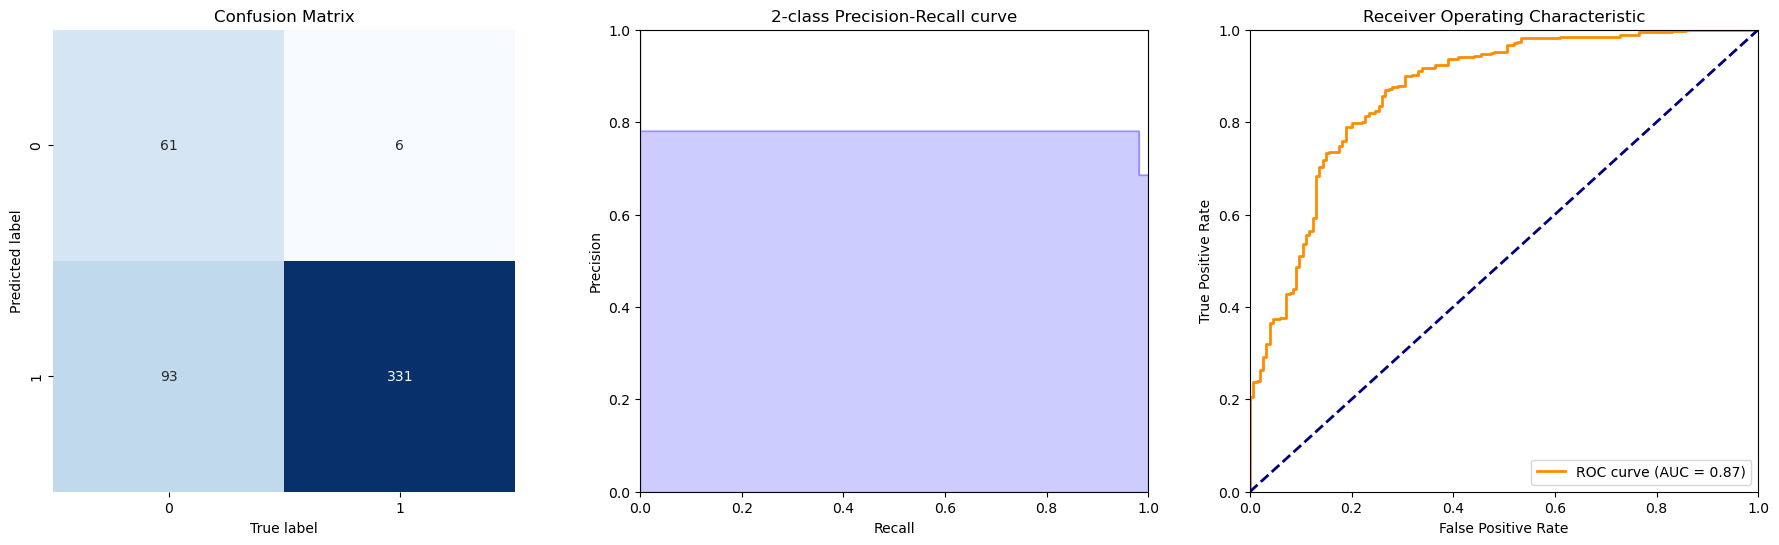

Accuracy : 0.8537 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8317 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9882 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8124                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


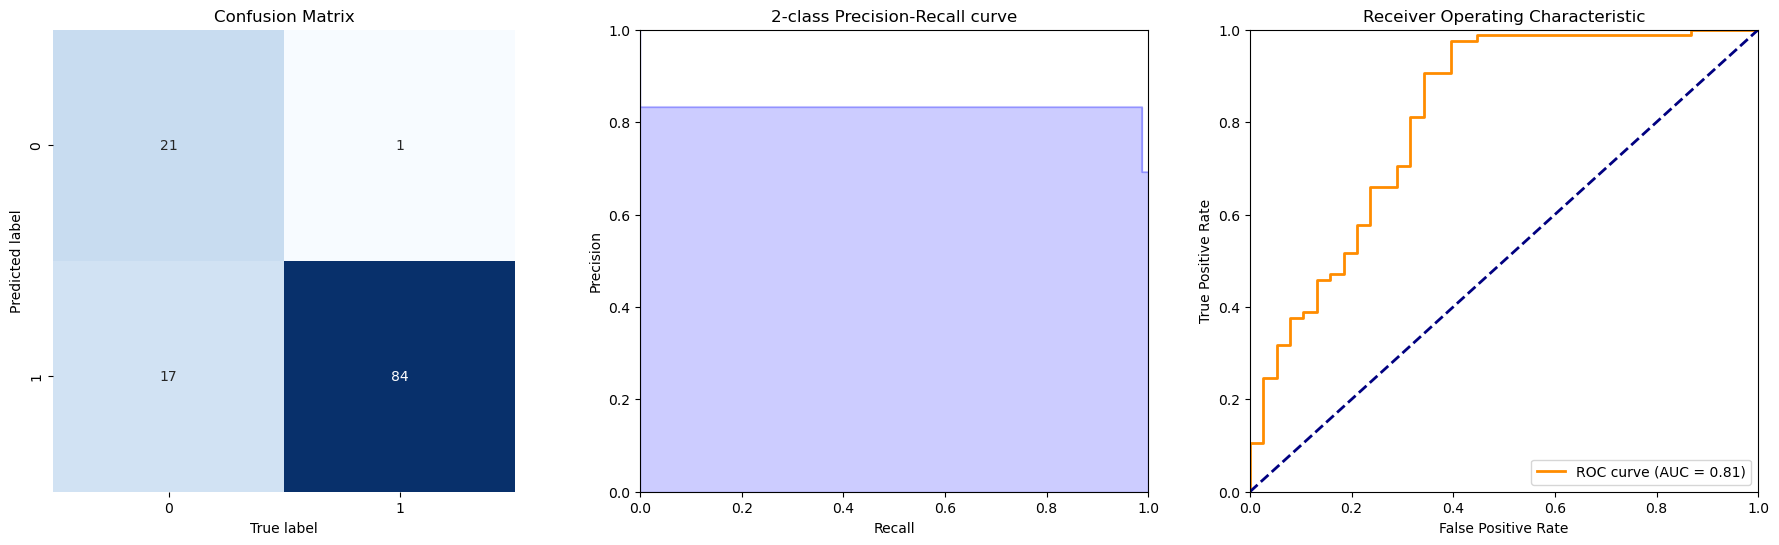


Train Results:
                 Model  Accuracy  Precision    Recall   ROC_AUC
0  Logistic Regression  0.796334   0.780142  0.979228  0.767101
1                  SVM  0.806517   0.786730  0.985163  0.824521
2                  GNB  0.792261   0.780430  0.970326  0.744268
3                  KNN  0.794297   0.774419  0.988131  0.752813
4        Random Forest  0.798371   0.780660  0.982196  0.867798

Test Results:
                 Model  Accuracy  Precision    Recall   ROC_AUC
0  Logistic Regression  0.853659   0.831683  0.988235  0.858204
1                  SVM  0.853659   0.831683  0.988235  0.813003
2                  GNB  0.845528   0.836735  0.964706  0.832198
3                  KNN  0.837398   0.815534  0.988235  0.846904
4        Random Forest  0.853659   0.831683  0.988235  0.812384


In [52]:
# Keep the results in a dataframe
results_train = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC'])
results_test = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC'])

models = ['Logistic Regression', 'SVM', 'GNB', 'KNN', 'Random Forest']
classifiers = [logreg, svm_model, gnb_model, knn_model, rf_classifier]  # Include your Random Forest model here

for i, (model, model_name) in enumerate(zip(classifiers, models)):
    print('*' * (len(model_name) + 4))
    print('* %s *' % model_name)
    print('*' * (len(model_name) + 4))

    if model_name == 'Random Forest':
        probabilities_train = model.predict_proba(Xdt_train_scaled)[:, 1]  # Use the different dataset for Random Forest
        probabilities_test = model.predict_proba(Xdt_test_scaled)[:, 1]  # Use the different dataset for Random Forest
        
        # Use different ground truth labels for Random Forest
        accuracy_train, precision_train, recall_train, roc_auc_train = show_summary_report(ydt_train, probabilities_train)
        accuracy_test, precision_test, recall_test, roc_auc_test = show_summary_report(ydt_test, probabilities_test)
    else:
        probabilities_train = model.predict_proba(X_train_scaled)[:, 1]
        probabilities_test = model.predict_proba(X_test_scaled)[:, 1]
        
        # Use the regular ground truth labels for other models
        accuracy_train, precision_train, recall_train, roc_auc_train = show_summary_report(y_train, probabilities_train)
        accuracy_test, precision_test, recall_test, roc_auc_test = show_summary_report(y_test, probabilities_test)

    # Keep the results for both train and test
    results_train.loc[i] = {'Model': model_name,
                            'Accuracy': accuracy_train,
                            'Precision': precision_train,
                            'Recall': recall_train,
                            'ROC_AUC': roc_auc_train}
    
    results_test.loc[i] = {'Model': model_name,
                            'Accuracy': accuracy_test,
                            'Precision': precision_test,
                            'Recall': recall_test,
                            'ROC_AUC': roc_auc_test}
    
    print()

# Print and display the results for both train and test
print("Train Results:")
print(results_train)

print("\nTest Results:")
print(results_test)

In [73]:
# Combine the classifiers into an ensemble that outperforms them all on the validation set, using a soft or hard voting classifier.

from sklearn.ensemble import VotingClassifier

named_estimators = [("Logistic Regression", logreg), ("GNB", gnb_model), ("KNN", knn_model)]

In [74]:
voting_clf = VotingClassifier(named_estimators)

In [75]:
voting_clf.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                             ('GNB', GaussianNB()),
                             ('KNN', KNeighborsClassifier(n_neighbors=37))])

In [76]:
voting_clf.score(X_test_scaled, y_test)

0.8536585365853658

In [78]:
voting_clf.voting = "soft"
voting_clf.score(X_test_scaled, y_test)

0.8536585365853658

In [53]:
# Make predictions on the test data
y_pred = gnb_model.predict(X_test_scaled)

# Create a DataFrame for the predictions
df_predict = pd.DataFrame({'X_test': X_test_scaled.tolist(), 'y_test': y_test, 'predicted': y_pred})

# 'X_test' will contain the scaled test data, 'y_test' the true labels, and 'predicted' the model predictions

In [54]:
df_predict

,X_test,y_test,predicted
Serial_no,,,
151,"[-0.7485862381397372, 0.11601664645686248, -0....",0,0
560,"[-0.7485862381397372, -0.20903851627345768, 0....",1,1
599,"[-0.7485862381397372, 0.6873820874792564, 0.38...",1,1
236,"[0.25020681329127087, -0.004425824426045841, 0...",1,1
146,"[-0.7485862381397372, -0.49580630408990606, -0...",1,1
...,...,...,...
364,"[-0.7485862381397372, -0.389934737020374, -0.6...",1,1
281,"[0.25020681329127087, -0.22872473738301927, 0....",0,0
8,"[2.247792916153287, -0.38636951587454793, 0.13...",0,0


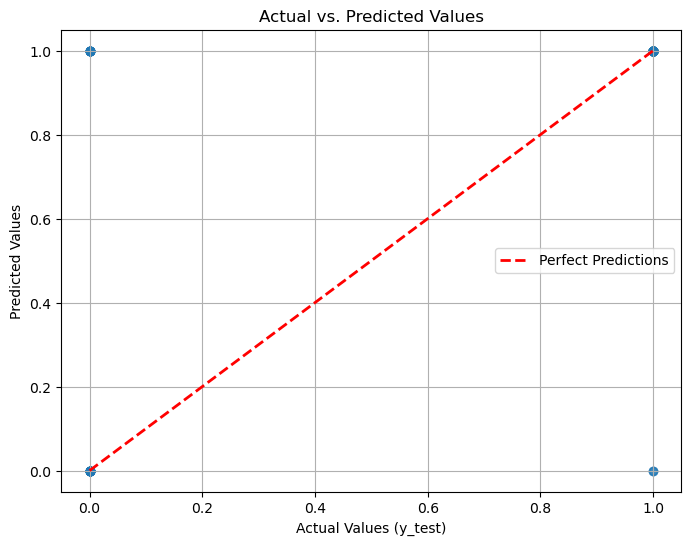

In [55]:
# Extract 'y_test' and 'predicted' columns from the DataFrame
y_test = df_predict['y_test']
predicted = df_predict['predicted']

# Create a scatter plot of y_test versus predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted, alpha=0.5)  # Scatter plot with transparency
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
max_value = max(y_test.max(), predicted.max())
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--', linewidth=2, label="Perfect Predictions")

# Show legend
plt.legend()

# Display the plot
plt.show()

In [56]:
count_instances = len(df_predict[(df_predict['y_test'] == 0) & (df_predict['predicted'] == 1)])

print(f"Number of instances where y_test=0 and predicted=1: {count_instances}")

Number of instances where y_test=0 and predicted=1: 16


## Summary

## Next Steps

In [57]:
#

In [58]:
Xnn = X_train.values

In [59]:
ynn = y_train.values

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(17,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(Xnn, ynn, epochs=150, batch_size=10, verbose=0)
# make class predictions with the model
predictions = (model.predict(Xnn) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(5):
 print('%s => %d (expected %d)' % (Xnn[i].tolist(), predictions[i], ynn[i]))

16/16 [==============================] - 0s 689us/step
[0.0, 3254.0, 50.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0] => 1 (expected 1)
[1.0, 3315.0, 96.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0] => 1 (expected 1)
[2.0, 3340.0, 150.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0] => 1 (expected 0)
[1.0, 2653.0, 113.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0] => 0 (expected 0)
[0.0, 2620.0, 150.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0] => 1 (expected 1)


In [61]:
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
62/62 [==============================] - 0s 967us/step - loss: 2.5596 - accuracy: 0.6792
Epoch 2/150
62/62 [==============================] - 0s 958us/step - loss: 1.2692 - accuracy: 0.7248
Epoch 3/150
62/62 [==============================] - 0s 1ms/step - loss: 2.4248 - accuracy: 0.6205
Epoch 4/150
62/62 [==============================] - 0s 1ms/step - loss: 1.2696 - accuracy: 0.7052
Epoch 5/150
62/62 [==============================] - 0s 1ms/step - loss: 1.3605 - accuracy: 0.7003
Epoch 6/150
62/62 [==============================] - 0s 989us/step - loss: 1.2249 - accuracy: 0.7085
Epoch 7/150
62/62 [==============================] - 0s 926us/step - loss: 1.1204 - accuracy: 0.7020
Epoch 8/150
62/62 [==============================] - 0s 1ms/step - loss: 1.3972 - accuracy: 0.6694
Epoch 9/150
62/62 [==============================] - 0s 941us/step - loss: 2.3430 - accuracy: 0.6303
Epoch 10/150
62/62 [==============================] - 0s 754us/step - loss: 1.1342 - accuracy: 0.71

In [62]:
# evaluate the keras model
_, accuracy = model.evaluate(Xnn, ynn)
print('Accuracy: %.2f' % (accuracy*100))

16/16 [==============================] - 0s 767us/step - loss: 3.6987 - accuracy: 0.6986
Accuracy: 69.86
